# Concrete Case Study

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score
from math import sqrt

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [4]:
data = pd.read_csv("Concrete_Data.csv")

In [5]:
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
data.shape

(1030, 9)

array([[<AxesSubplot:title={'center':'cement'}>,
        <AxesSubplot:title={'center':'slag'}>,
        <AxesSubplot:title={'center':'flyash'}>],
       [<AxesSubplot:title={'center':'water'}>,
        <AxesSubplot:title={'center':'superplasticizer'}>,
        <AxesSubplot:title={'center':'coarseaggregate'}>],
       [<AxesSubplot:title={'center':'fineaggregate'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'csMPa'}>]], dtype=object)

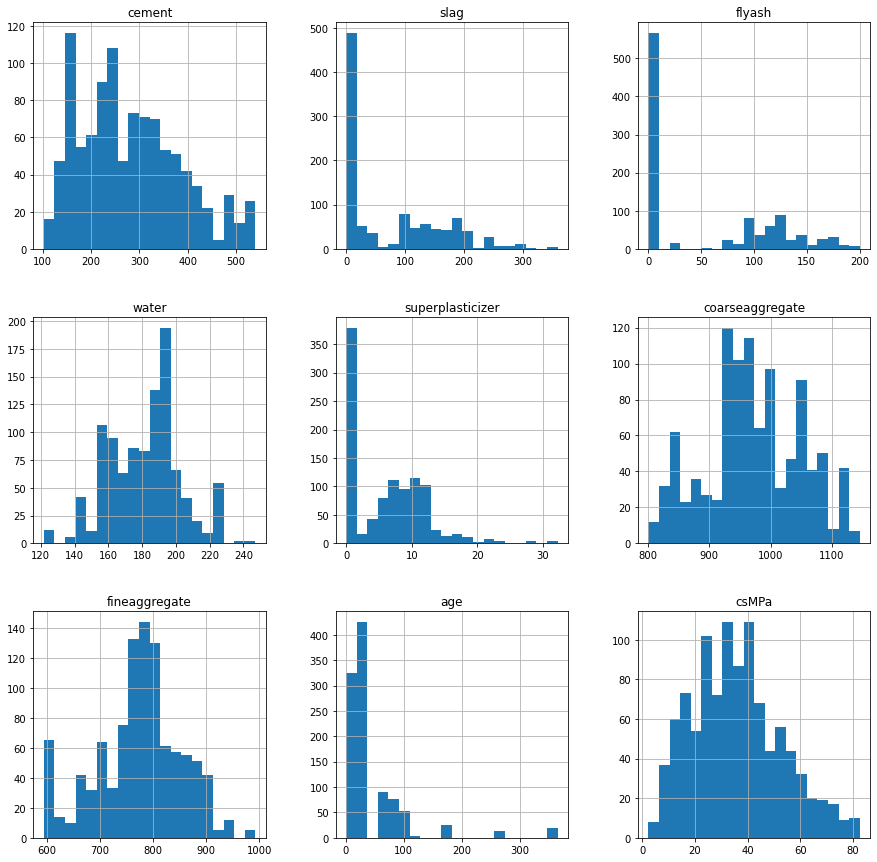

In [7]:
data.hist(bins = 20, figsize = (15,15))

In [8]:
X = data.iloc[:,:8]
y=data.iloc[:,8]
y.shape

(1030,)

In [9]:
# Always scale the values first
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled

array([[ 2.47791487, -0.85688789, -0.84714393, ...,  0.86315424,
        -1.21767004, -0.27973311],
       [ 2.47791487, -0.85688789, -0.84714393, ...,  1.05616419,
        -1.21767004, -0.27973311],
       [ 0.49142531,  0.79552649, -0.84714393, ..., -0.52651741,
        -2.24091709,  3.55306569],
       ...,
       [-1.27008832,  0.75957923,  0.85063487, ..., -1.03606368,
         0.0801067 , -0.27973311],
       [-1.16860982,  1.30806485, -0.84714393, ...,  0.21464081,
         0.19116644, -0.27973311],
       [-0.19403325,  0.30849909,  0.3769452 , ..., -1.39506219,
        -0.15074782, -0.27973311]])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size = 0.30, random_state = 100)

In [11]:
y_train

282    36.64
599    20.97
252    38.33
193    34.56
644    34.29
       ...  
802    31.65
53     49.19
350    33.70
79     41.30
792    42.13
Name: csMPa, Length: 721, dtype: float64

In [12]:
keras.backend.clear_session()

In [13]:
model = Sequential()
model.add(Dense(10, input_dim = 8, activation = "relu", kernel_initializer = "glorot_normal"))
model.add(Dense(10, activation = "relu"))
model.add(Dense(10, activation = "relu"))
model.add(Dense(1))      # Output layer = 1, since it is regression problem

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                90        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss = "mean_squared_error", optimizer = keras.optimizers.SGD(learning_rate = 0.001), metrics = ["RootMeanSquaredError"])

In [16]:
model.fit(X_train, y_train, epochs = 1000)

Epoch 1/1000
23/23 [==============================] - 0s 390us/step - loss: 1405.1923 - root_mean_squared_error: 37.4859
Epoch 2/1000
23/23 [==============================] - 0s 390us/step - loss: 195.1004 - root_mean_squared_error: 13.9678
Epoch 3/1000
23/23 [==============================] - 0s 390us/step - loss: 126.5462 - root_mean_squared_error: 11.2493
Epoch 4/1000
23/23 [==============================] - 0s 390us/step - loss: 116.8513 - root_mean_squared_error: 10.8098
Epoch 5/1000
23/23 [==============================] - 0s 390us/step - loss: 108.4137 - root_mean_squared_error: 10.4122
Epoch 6/1000
23/23 [==============================] - 0s 390us/step - loss: 90.7113 - root_mean_squared_error: 9.5242
Epoch 7/1000
23/23 [==============================] - 0s 390us/step - loss: 91.0305 - root_mean_squared_error: 9.5410
Epoch 8/1000
23/23 [==============================] - 0s 390us/step - loss: 85.8755 - root_mean_squared_error: 9.2669
Epoch 9/1000
23/23 [=========================

23/23 [==============================] - 0s 390us/step - loss: 41.8232 - root_mean_squared_error: 6.4671
Epoch 70/1000
23/23 [==============================] - 0s 434us/step - loss: 34.0672 - root_mean_squared_error: 5.8367
Epoch 71/1000
23/23 [==============================] - 0s 390us/step - loss: 34.4808 - root_mean_squared_error: 5.8720
Epoch 72/1000
23/23 [==============================] - 0s 477us/step - loss: 33.3032 - root_mean_squared_error: 5.7709
Epoch 73/1000
23/23 [==============================] - 0s 434us/step - loss: 38.5101 - root_mean_squared_error: 6.2056
Epoch 74/1000
23/23 [==============================] - 0s 434us/step - loss: 31.3091 - root_mean_squared_error: 5.5955
Epoch 75/1000
23/23 [==============================] - 0s 347us/step - loss: 35.3654 - root_mean_squared_error: 5.9469
Epoch 76/1000
23/23 [==============================] - 0s 477us/step - loss: 33.7889 - root_mean_squared_error: 5.8128
Epoch 77/1000
23/23 [==============================] - 0s 477u

23/23 [==============================] - 0s 390us/step - loss: 26.0308 - root_mean_squared_error: 5.1020
Epoch 138/1000
23/23 [==============================] - 0s 391us/step - loss: 26.5179 - root_mean_squared_error: 5.1496
Epoch 139/1000
23/23 [==============================] - 0s 390us/step - loss: 41.9820 - root_mean_squared_error: 6.4793
Epoch 140/1000
23/23 [==============================] - 0s 390us/step - loss: 29.3753 - root_mean_squared_error: 5.4199
Epoch 141/1000
23/23 [==============================] - 0s 347us/step - loss: 28.7592 - root_mean_squared_error: 5.3628
Epoch 142/1000
23/23 [==============================] - 0s 390us/step - loss: 25.8118 - root_mean_squared_error: 5.0805
Epoch 143/1000
23/23 [==============================] - 0s 434us/step - loss: 31.2089 - root_mean_squared_error: 5.5865
Epoch 144/1000
23/23 [==============================] - 0s 347us/step - loss: 28.7848 - root_mean_squared_error: 5.3651
Epoch 145/1000
23/23 [==============================] -

23/23 [==============================] - 0s 390us/step - loss: 22.3943 - root_mean_squared_error: 4.7323
Epoch 206/1000
23/23 [==============================] - 0s 434us/step - loss: 45.8015 - root_mean_squared_error: 6.7677
Epoch 207/1000
23/23 [==============================] - 0s 390us/step - loss: 25.3726 - root_mean_squared_error: 5.0371
Epoch 208/1000
23/23 [==============================] - 0s 347us/step - loss: 22.9618 - root_mean_squared_error: 4.7918
Epoch 209/1000
23/23 [==============================] - 0s 390us/step - loss: 23.9247 - root_mean_squared_error: 4.8913
Epoch 210/1000
23/23 [==============================] - 0s 390us/step - loss: 40.0637 - root_mean_squared_error: 6.3296
Epoch 211/1000
23/23 [==============================] - 0s 347us/step - loss: 24.4093 - root_mean_squared_error: 4.9406
Epoch 212/1000
23/23 [==============================] - 0s 390us/step - loss: 25.4196 - root_mean_squared_error: 5.0418
Epoch 213/1000
23/23 [==============================] -

23/23 [==============================] - 0s 347us/step - loss: 24.9310 - root_mean_squared_error: 4.9931
Epoch 274/1000
23/23 [==============================] - 0s 390us/step - loss: 26.5560 - root_mean_squared_error: 5.1532
Epoch 275/1000
23/23 [==============================] - 0s 390us/step - loss: 24.0252 - root_mean_squared_error: 4.9016
Epoch 276/1000
23/23 [==============================] - 0s 351us/step - loss: 21.2147 - root_mean_squared_error: 4.6059
Epoch 277/1000
23/23 [==============================] - 0s 434us/step - loss: 24.0210 - root_mean_squared_error: 4.9011
Epoch 278/1000
23/23 [==============================] - 0s 347us/step - loss: 20.4355 - root_mean_squared_error: 4.5206
Epoch 279/1000
23/23 [==============================] - 0s 390us/step - loss: 20.1465 - root_mean_squared_error: 4.4885
Epoch 280/1000
23/23 [==============================] - 0s 434us/step - loss: 23.8525 - root_mean_squared_error: 4.8839
Epoch 281/1000
23/23 [==============================] -

23/23 [==============================] - 0s 390us/step - loss: 20.0973 - root_mean_squared_error: 4.4830
Epoch 342/1000
23/23 [==============================] - 0s 433us/step - loss: 21.9569 - root_mean_squared_error: 4.6858
Epoch 343/1000
23/23 [==============================] - 0s 434us/step - loss: 33.8591 - root_mean_squared_error: 5.8189
Epoch 344/1000
23/23 [==============================] - 0s 347us/step - loss: 18.5507 - root_mean_squared_error: 4.3071
Epoch 345/1000
23/23 [==============================] - 0s 477us/step - loss: 24.1647 - root_mean_squared_error: 4.9158
Epoch 346/1000
23/23 [==============================] - 0s 564us/step - loss: 21.9884 - root_mean_squared_error: 4.6892
Epoch 347/1000
23/23 [==============================] - 0s 434us/step - loss: 20.2867 - root_mean_squared_error: 4.5041
Epoch 348/1000
23/23 [==============================] - 0s 347us/step - loss: 20.3497 - root_mean_squared_error: 4.5111
Epoch 349/1000
23/23 [==============================] -

23/23 [==============================] - 0s 434us/step - loss: 21.9706 - root_mean_squared_error: 4.6873
Epoch 410/1000
23/23 [==============================] - 0s 390us/step - loss: 28.3355 - root_mean_squared_error: 5.3231
Epoch 411/1000
23/23 [==============================] - 0s 434us/step - loss: 20.0217 - root_mean_squared_error: 4.4746
Epoch 412/1000
23/23 [==============================] - 0s 434us/step - loss: 21.4102 - root_mean_squared_error: 4.6271
Epoch 413/1000
23/23 [==============================] - 0s 347us/step - loss: 26.3622 - root_mean_squared_error: 5.1344
Epoch 414/1000
23/23 [==============================] - 0s 390us/step - loss: 17.9924 - root_mean_squared_error: 4.2417
Epoch 415/1000
23/23 [==============================] - 0s 369us/step - loss: 18.4500 - root_mean_squared_error: 4.2954
Epoch 416/1000
23/23 [==============================] - 0s 390us/step - loss: 18.2030 - root_mean_squared_error: 4.2665
Epoch 417/1000
23/23 [==============================] -

23/23 [==============================] - 0s 390us/step - loss: 19.5385 - root_mean_squared_error: 4.4202
Epoch 478/1000
23/23 [==============================] - 0s 390us/step - loss: 18.7664 - root_mean_squared_error: 4.3320
Epoch 479/1000
23/23 [==============================] - 0s 347us/step - loss: 17.6846 - root_mean_squared_error: 4.2053
Epoch 480/1000
23/23 [==============================] - 0s 434us/step - loss: 18.5793 - root_mean_squared_error: 4.3104
Epoch 481/1000
23/23 [==============================] - 0s 434us/step - loss: 18.3098 - root_mean_squared_error: 4.2790
Epoch 482/1000
23/23 [==============================] - 0s 390us/step - loss: 22.2993 - root_mean_squared_error: 4.7222
Epoch 483/1000
23/23 [==============================] - 0s 434us/step - loss: 24.3180 - root_mean_squared_error: 4.9313
Epoch 484/1000
23/23 [==============================] - 0s 390us/step - loss: 19.2921 - root_mean_squared_error: 4.3923
Epoch 485/1000
23/23 [==============================] -

23/23 [==============================] - 0s 347us/step - loss: 18.3964 - root_mean_squared_error: 4.2891
Epoch 546/1000
23/23 [==============================] - 0s 390us/step - loss: 19.2613 - root_mean_squared_error: 4.3888
Epoch 547/1000
23/23 [==============================] - 0s 390us/step - loss: 18.6041 - root_mean_squared_error: 4.3133
Epoch 548/1000
23/23 [==============================] - 0s 413us/step - loss: 20.6844 - root_mean_squared_error: 4.5480
Epoch 549/1000
23/23 [==============================] - 0s 390us/step - loss: 19.3927 - root_mean_squared_error: 4.4037
Epoch 550/1000
23/23 [==============================] - 0s 390us/step - loss: 17.9880 - root_mean_squared_error: 4.2412
Epoch 551/1000
23/23 [==============================] - 0s 390us/step - loss: 16.9925 - root_mean_squared_error: 4.1222
Epoch 552/1000
23/23 [==============================] - 0s 347us/step - loss: 25.3059 - root_mean_squared_error: 5.0305
Epoch 553/1000
23/23 [==============================] -

23/23 [==============================] - 0s 477us/step - loss: 29.9463 - root_mean_squared_error: 5.4723
Epoch 614/1000
23/23 [==============================] - 0s 390us/step - loss: 21.8627 - root_mean_squared_error: 4.6758
Epoch 615/1000
23/23 [==============================] - 0s 390us/step - loss: 17.5997 - root_mean_squared_error: 4.1952
Epoch 616/1000
23/23 [==============================] - 0s 477us/step - loss: 18.9886 - root_mean_squared_error: 4.3576
Epoch 617/1000
23/23 [==============================] - 0s 390us/step - loss: 19.0517 - root_mean_squared_error: 4.3648
Epoch 618/1000
23/23 [==============================] - 0s 390us/step - loss: 19.3441 - root_mean_squared_error: 4.3982
Epoch 619/1000
23/23 [==============================] - 0s 520us/step - loss: 20.0777 - root_mean_squared_error: 4.4808
Epoch 620/1000
23/23 [==============================] - 0s 434us/step - loss: 18.9098 - root_mean_squared_error: 4.3485
Epoch 621/1000
23/23 [==============================] -

23/23 [==============================] - 0s 390us/step - loss: 17.1852 - root_mean_squared_error: 4.1455
Epoch 682/1000
23/23 [==============================] - 0s 390us/step - loss: 20.2740 - root_mean_squared_error: 4.5027
Epoch 683/1000
23/23 [==============================] - 0s 434us/step - loss: 16.5269 - root_mean_squared_error: 4.0653
Epoch 684/1000
23/23 [==============================] - 0s 434us/step - loss: 16.7976 - root_mean_squared_error: 4.0985
Epoch 685/1000
23/23 [==============================] - 0s 347us/step - loss: 23.7696 - root_mean_squared_error: 4.8754
Epoch 686/1000
23/23 [==============================] - 0s 390us/step - loss: 16.3299 - root_mean_squared_error: 4.0410
Epoch 687/1000
23/23 [==============================] - 0s 390us/step - loss: 24.5901 - root_mean_squared_error: 4.9588
Epoch 688/1000
23/23 [==============================] - 0s 390us/step - loss: 20.1251 - root_mean_squared_error: 4.4861
Epoch 689/1000
23/23 [==============================] -

23/23 [==============================] - 0s 390us/step - loss: 18.7108 - root_mean_squared_error: 4.3256
Epoch 750/1000
23/23 [==============================] - 0s 390us/step - loss: 16.1114 - root_mean_squared_error: 4.0139
Epoch 751/1000
23/23 [==============================] - 0s 390us/step - loss: 17.1086 - root_mean_squared_error: 4.1363
Epoch 752/1000
23/23 [==============================] - 0s 347us/step - loss: 18.8454 - root_mean_squared_error: 4.3411
Epoch 753/1000
23/23 [==============================] - 0s 390us/step - loss: 17.5893 - root_mean_squared_error: 4.1940
Epoch 754/1000
23/23 [==============================] - 0s 390us/step - loss: 17.3740 - root_mean_squared_error: 4.1682
Epoch 755/1000
23/23 [==============================] - 0s 347us/step - loss: 18.6412 - root_mean_squared_error: 4.3175
Epoch 756/1000
23/23 [==============================] - 0s 390us/step - loss: 15.5424 - root_mean_squared_error: 3.9424
Epoch 757/1000
23/23 [==============================] -

23/23 [==============================] - 0s 390us/step - loss: 18.8225 - root_mean_squared_error: 4.3385
Epoch 818/1000
23/23 [==============================] - 0s 347us/step - loss: 18.2185 - root_mean_squared_error: 4.2683
Epoch 819/1000
23/23 [==============================] - 0s 390us/step - loss: 18.5037 - root_mean_squared_error: 4.3016
Epoch 820/1000
23/23 [==============================] - 0s 390us/step - loss: 31.4014 - root_mean_squared_error: 5.6037
Epoch 821/1000
23/23 [==============================] - 0s 347us/step - loss: 21.3124 - root_mean_squared_error: 4.6165
Epoch 822/1000
23/23 [==============================] - 0s 390us/step - loss: 15.8485 - root_mean_squared_error: 3.9810
Epoch 823/1000
23/23 [==============================] - 0s 347us/step - loss: 15.4591 - root_mean_squared_error: 3.9318
Epoch 824/1000
23/23 [==============================] - 0s 390us/step - loss: 15.6037 - root_mean_squared_error: 3.9502
Epoch 825/1000
23/23 [==============================] -

23/23 [==============================] - 0s 434us/step - loss: 18.1822 - root_mean_squared_error: 4.2641
Epoch 886/1000
23/23 [==============================] - 0s 390us/step - loss: 17.1646 - root_mean_squared_error: 4.1430
Epoch 887/1000
23/23 [==============================] - 0s 390us/step - loss: 19.6487 - root_mean_squared_error: 4.4327
Epoch 888/1000
23/23 [==============================] - 0s 477us/step - loss: 22.9201 - root_mean_squared_error: 4.7875
Epoch 889/1000
23/23 [==============================] - 0s 477us/step - loss: 17.8579 - root_mean_squared_error: 4.2259
Epoch 890/1000
23/23 [==============================] - 0s 390us/step - loss: 18.8102 - root_mean_squared_error: 4.3371
Epoch 891/1000
23/23 [==============================] - 0s 434us/step - loss: 16.7517 - root_mean_squared_error: 4.0929
Epoch 892/1000
23/23 [==============================] - 0s 434us/step - loss: 15.9587 - root_mean_squared_error: 3.9948
Epoch 893/1000
23/23 [==============================] -

23/23 [==============================] - 0s 347us/step - loss: 16.9410 - root_mean_squared_error: 4.1160
Epoch 954/1000
23/23 [==============================] - 0s 390us/step - loss: 18.1493 - root_mean_squared_error: 4.2602
Epoch 955/1000
23/23 [==============================] - 0s 347us/step - loss: 19.4786 - root_mean_squared_error: 4.4135
Epoch 956/1000
23/23 [==============================] - 0s 390us/step - loss: 16.5665 - root_mean_squared_error: 4.0702
Epoch 957/1000
23/23 [==============================] - 0s 434us/step - loss: 15.3716 - root_mean_squared_error: 3.9207
Epoch 958/1000
23/23 [==============================] - 0s 347us/step - loss: 16.0257 - root_mean_squared_error: 4.0032
Epoch 959/1000
23/23 [==============================] - 0s 390us/step - loss: 16.7778 - root_mean_squared_error: 4.0961
Epoch 960/1000
23/23 [==============================] - 0s 347us/step - loss: 17.0866 - root_mean_squared_error: 4.1336
Epoch 961/1000
23/23 [==============================] -

In [17]:
pred_train = model.predict(X_train)
pred_train.shape

(721, 1)

In [19]:
pred_test = model.predict(X_test)
pred_test.shape

(309, 1)

In [21]:
train_r2 = r2_score(y_train,pred_train)
test_r2 = r2_score(y_test,pred_test)
print(train_r2)
print(test_r2)

0.9474113308065532
0.8911415582458591
